### Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import pandas as pd
import numpy as np
from sklearn import metrics
from planet import f2

C:\Users\I863552\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
PATH = '../data/planet'
metrics = [f2]

In [4]:
torch.cuda.is_available()

True

### Data Inspection 

In [5]:
df = pd.read_csv(f'{PATH}/train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [6]:
train_filenames = os.listdir(f'{PATH}/train-jpg')
train_size = len(train_filenames)

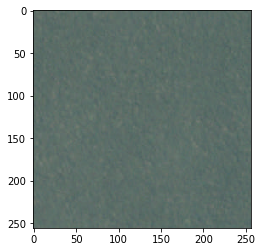

In [7]:
train_img_sample = plt.imread(f'{PATH}/train-jpg/{train_filenames[0]}')
plt.imshow(train_img_sample)

### Train 

In [46]:
arch = resnet34

In [47]:
def get_data(img_size=224):
    tfms = tfms_from_model(arch, img_size, transforms_top_down, max_zoom=1.1)
    val_idxs = get_cv_idxs(train_size)
    return ImageClassifierData.from_csv(f'{PATH}', csv_fname=f'{PATH}/train_v2.csv', tfms=tfms, suffix=".jpg", test_name="test-jpg", folder="train-jpg", val_idxs=val_idxs)

In [48]:
data = get_data(64)
learn = ConvLearner.pretrained(arch, data, metrics=metrics)

C:\Users\I863552\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
C:\Users\I863552\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\fastai\initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [11]:
learn.lr_find()

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.217101   0.394936   0.809427  



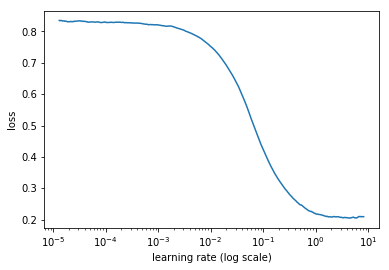

In [12]:
learn.sched.plot()

In [11]:
learning_rate = 2e-1

In [14]:
learn.fit(learning_rate, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.145019   0.132268   0.88492   
    1      0.139892   0.126161   0.889028                                                                              
    2      0.133255   0.12489    0.890742                                                                              
    3      0.134866   0.124315   0.892181                                                                              
    4      0.133307   0.122291   0.892591                                                                              
    5      0.132994   0.121156   0.894589                                                                              
    6      0.129207   0.120752   0.895602                                                                              



[0.12075229870860704, 0.8956022882459628]

In [15]:
learn.save('planet_64')

In [16]:
learn.load('planet_64')

In [17]:
learn.unfreeze()

In [12]:
learning_rates = [learning_rate/9, learning_rate/3, learning_rate]

In [18]:
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.117756   0.107285   0.909915  
    1      0.111516   0.102029   0.914887                                                                              
    2      0.105507   0.098735   0.916987                                                                              
    3      0.107508   0.100342   0.915234                                                                              
    4      0.102461   0.097341   0.918426                                                                              
    5      0.096196   0.095641   0.920689                                                                              
    6      0.097601   0.095332   0.92045                                                                               



[0.09533233476677304, 0.9204502005001651]

In [19]:
learn.save('planet_64')

In [20]:
learn.load('planet_64')

In [21]:
learn.set_data(get_data(128))
learn.freeze()

In [22]:
learn.save('planet_128')

In [23]:
learn.load('planet_128')

In [24]:
learn.fit(learning_rate, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.097218   0.095917   0.918158  
    1      0.096268   0.094088   0.92005                                                                               
    2      0.097839   0.094497   0.919405                                                                              
    3      0.096152   0.093415   0.919898                                                                              
    4      0.093871   0.093515   0.920274                                                                              
    5      0.095049   0.093036   0.920345                                                                              
    6      0.093515   0.093197   0.920381                                                                              



[0.09319697126350408, 0.9203814134213848]

In [25]:
learn.unfreeze()

In [26]:
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.094419   0.088973   0.925279  
    1      0.093092   0.088335   0.927969                                                                              
    2      0.089944   0.087174   0.927651                                                                              
    3      0.093153   0.087939   0.927403                                                                              
    4      0.088003   0.086539   0.928223                                                                              
    5      0.087234   0.084861   0.929675                                                                              
    6      0.08547    0.084865   0.928906                                                                              



[0.08486454633005318, 0.9289063813157337]

In [27]:
learn.save('planet_128')

In [28]:
learn.load('planet_128')

In [29]:
learn.set_data(get_data(256))
learn.freeze()

In [30]:
learn.fit(learning_rate, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.093023   0.089874   0.924105  
    1      0.091678   0.089636   0.92313                                                                               
    2      0.08757    0.088613   0.925502                                                                              
    3      0.088176   0.088675   0.925817                                                                              
    4      0.088895   0.08821    0.924359                                                                              
    5      0.088193   0.087791   0.925596                                                                              
    6      0.088349   0.087571   0.926044                                                                              



[0.08757076564166118, 0.92604421467141]

In [31]:
learn.save('planet_256')

In [34]:
learn.load('planet_256')

In [49]:
learn.set_data(get_data(226))
learn.unfreeze()

In [ ]:
learn.fit(learning_rates, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                                                                                    
    0      0.087881   0.083599   0.930547  
    1      0.089696   0.085918   0.926783                                                                              
    2      0.081759   0.082568   0.931676                                                                              
    3      0.087333   0.08505    0.929046                                                                              
    4      0.086817   0.084419   0.929439                                                                              
    5      0.078901   0.082552   0.931963                                                                              
 44%|█████████████████████████████▎                                     | 221/506 [07:08<09:13,  1.94s/it, loss=0.0781]

In [ ]:
learn.save('planet_226_all')

In [58]:
learn.load('planet_226_all')

In [59]:
learn.set_data(get_data(256))
multi_preds, y = learn.TTA(is_test=True)
preds = np.mean(multi_preds, 0)

In [60]:
preds = np.mean(multi_preds, 0)
df = pd.DataFrame(preds)
df.columns = data.classes
df.head()

,agriculture,artisinal_mine,bare_ground,blooming,blow_down,clear,cloudy,conventional_mine,cultivation,habitation,haze,partly_cloudy,primary,road,selective_logging,slash_burn,water
0,0.009625,0.000119,0.001576,0.180742,0.003306,0.999866,0.000044,0.000600,0.011341,0.003345,0.000080,0.000044,0.999882,0.005571,0.090825,0.000745,0.002234
1,0.931435,0.000545,0.097341,0.000693,0.002094,0.431882,0.000756,0.000585,0.153409,0.432914,0.002817,0.451055,0.984491,0.316567,0.001563,0.004725,0.030619
2,0.339113,0.000393,0.003552,0.000449,0.000134,0.053660,0.016553,0.000984,0.041234,0.025670,0.767179,0.022161,0.970364,0.980973,0.001350,0.000495,0.506130
3,0.185271,0.000066,0.002551,0.001252,0.000173,0.993021,0.000028,0.000113,0.057891,0.017435,0.003196,0.001856,0.999772,0.148532,0.001285,0.000824,0.990501
4,0.101314,0.000078,0.002444,0.004781,0.006580,0.999602,0.000065,0.000222,0.028719,0.006560,0.000082,0.000616,0.999741,0.036506,0.008057,0.000796,0.018160


In [61]:
result_map = {'tags':[]}

for index, row in df.iterrows():
    temp = []
    for column in data.classes:
        if row[column] > 0.5:
            temp.append(column)
    result_map['tags'].append(' '.join(temp))

In [62]:
submit_df = pd.DataFrame(result_map)
submit_df.head()

,tags
0,clear primary
1,agriculture primary
2,haze primary road water
3,clear primary water
4,clear primary


In [63]:
submit_df.insert(0, 'image_name', [fn[9:-4] for fn in data.test_ds.fnames])
submit_df.head()

,image_name,tags
0,file_0,clear primary
1,file_1,agriculture primary
2,file_10,haze primary road water
3,file_100,clear primary water
4,file_1000,clear primary


In [64]:
SUBMIT_FILE_PATH = 'submit/planet.gz' 
submit_df.to_csv(f'{SUBMIT_FILE_PATH}', compression='gzip', index=False)
FileLink(f'{SUBMIT_FILE_PATH}')

C:\Users\I863552\Documents\fastai\courses\dl1\kaggle\submit\planet.gz